Ok, we have a comparison between HAT & Kepler based just on data volume.

# What about their relative _precision_? (skip down to just load in results of analysis)
Stick to the metric of "binned to 1 hour, what is the standard deviation of an intrinsically constant source?"

Compare HAT vs TESS vs Kepler.

In [1]:
from IPython.display import Image

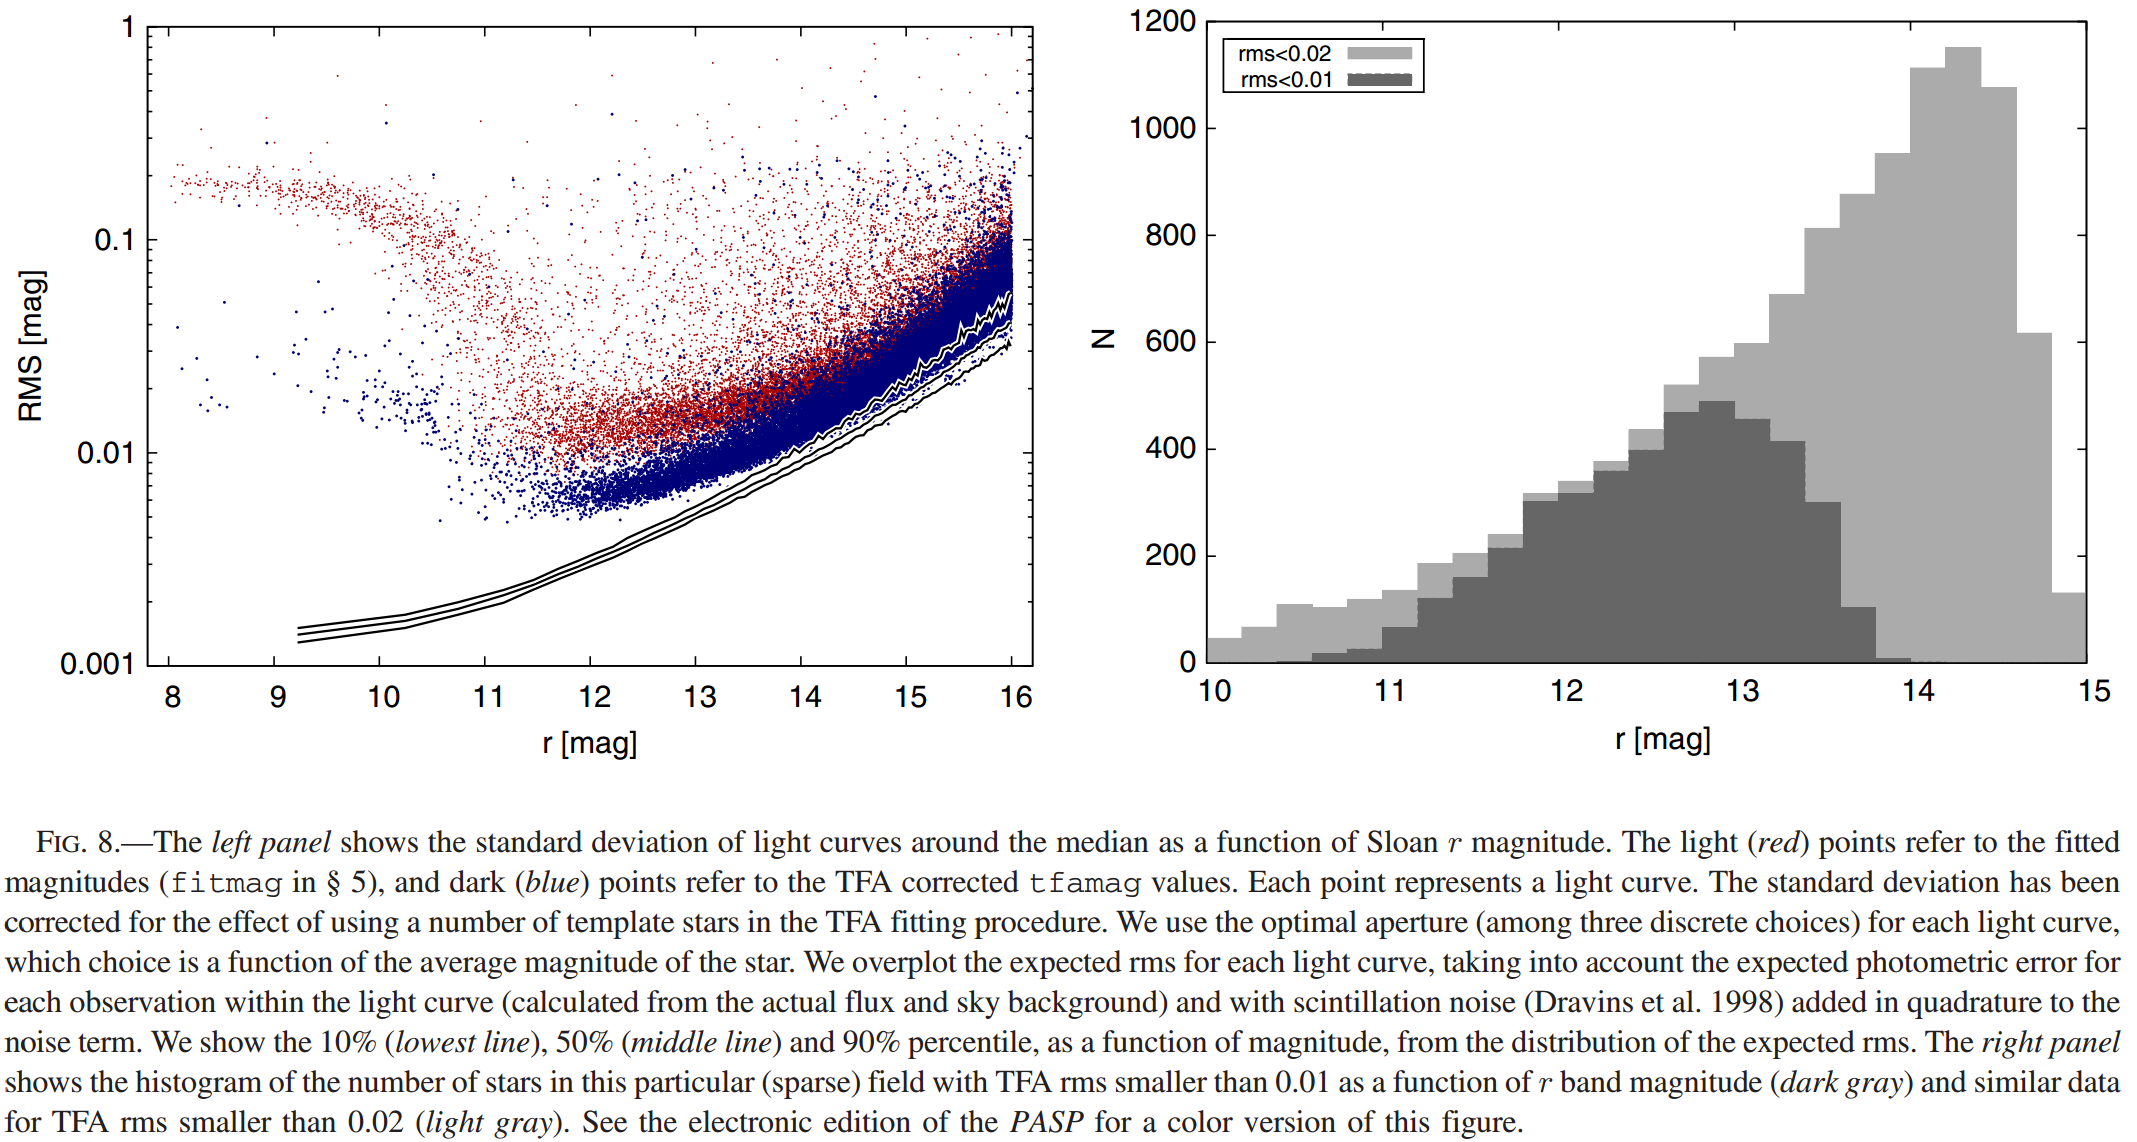

In [2]:
Image('../../hat/doc/HAT_precision.png')

I'm confused. In the above plot, what is the timescale for "RMS [mag]" in the LHS plot?

I think it's the ~5.5 minute cadence used for most of the HAT observations (e.g., Hartman, Bakos, Kovacs and Noyes 2010), and calculated as:

\begin{equation}
\mathrm{rms} = \sqrt{\frac{\sum(m_i - \langle m \rangle)^2}{N-N_p}},
\end{equation}
"for $m_i$ the individual magnitudes, $\langle m \rangle$ the average magnitude, $N$ the number of the points in the LC, and the $N_p=544$ the number of parameters used in applying EPD/TFA."

In [3]:
ls

debinfo_170129.csv    kepler_eb_catalog.ipynb  plots/
debpaths.csv          lightcurve-work.ipynb    precision_comparison.ipynb
hat_eb_catalog.ipynb  nb-data/                 weirdpaths.csv


In [4]:
ls nb-data/

checkplot-HAT-199-0000452.pkl
checkplot-HAT-199-0000452.png
checkplot-inj-HAT-199-0000452.pkl
checkplot-inj-HAT-199-0000452.png
checkplot-injresiduals-HAT-199-0000452.pkl
HAT-579-0051858-V0-DR0-e867e20a15f25116548f6cdf8d5105f2-hatlc.csv
HAT-772-0554686-V0-DR0-hatlc.sqlite
HAT-777-0058978-V0-DR0-hatlc.sqlite
HAT_rms_vs_mag.csv
kepler_and_johnson_bandpasses.jpg
kepler_precision.csv
plots/


In [5]:
import pickle
import numpy as np
pklpath = 'nb-data/checkplot-HAT-199-0000452.pkl'
thislc = pickle.load(open(pklpath, 'rb'))

In [6]:
thislc.keys()

dict_keys(['normto', 'sigclip', 'pdm', 'objectinfo', 'objectid', 'normmingap', 'varinfo', 'finderchart', 'status', 'magseries', 'bls'])

In [7]:
thislc['objectinfo']

{'bmag': 8.869,
 'bvcolor': 0.3439999999999994,
 'decl': 33.800232,
 'hatid': 'HAT-199-0000452',
 'hmag': 7.637,
 'ijcolor': None,
 'jkcolor': 0.17499999999999982,
 'jmag': 7.768,
 'kmag': 7.593,
 'ndet': 4351,
 'network': 'HN',
 'objecttags': None,
 'pmdecl': 11.7,
 'pmdecl_err': 1.0,
 'pmra': 1.6,
 'pmra_err': 1.0,
 'propermotion': 11.77530298964736,
 'ra': 292.935637,
 'reducedpropermotion': -1.8771395462441722,
 'sdssg': None,
 'sdssi': None,
 'sdssr': None,
 'stations': 'HN05,HN08',
 'twomassid': '19314455+3348008 ',
 'ucac4id': '146114592',
 'vmag': 8.525}

In [8]:
meanmag = np.mean(thislc['magseries']['mags'])
mags = thislc['magseries']['mags']
N_p = 544
N = thislc['objectinfo']['ndet']
rms = np.sqrt(np.sum( (mags - meanmag)**2) / (N - N_p))
rms

0.020000284232309356

Hartman et al. (2010) use the following to convert btwn 2MASS and Sloan magnitudes:
\begin{equation}
r = 0.6975 + 2.9782J − 0.8809H − 1.1230K_S.
\end{equation}

In [9]:
if thislc['objectinfo']['sdssr']:
    rmag = thislc['objectinfo']['sdssr']
elif thislc['objectinfo']['jmag'] and thislc['objectinfo']['hmag'] and thislc['objectinfo']['kmag']:
    rmag = 0.6975 + 2.9782 * thislc['objectinfo']['jmag'] - 0.8809 * thislc['objectinfo']['hmag'] - 1.1230 * thislc['objectinfo']['kmag']
else:
    rmag = -99

In [10]:
rmag

8.5777853

So what we _want_ is a histogram of the RMS precision for HAT LCs (in the DEB sample).
And a histogram of the RMS precison of Kepler Eclipsing Binary Catalog LCs.

Additionally, we want histograms of the _observed magnitudes_.

Additionally, we want a plot that compares (even if roughly) the precision as a function of magnitude for Kepler vs TESS vs HAT.

(N.b. this might be another selling point of the HAT LCs for an EB catalog: they are **brighter**)

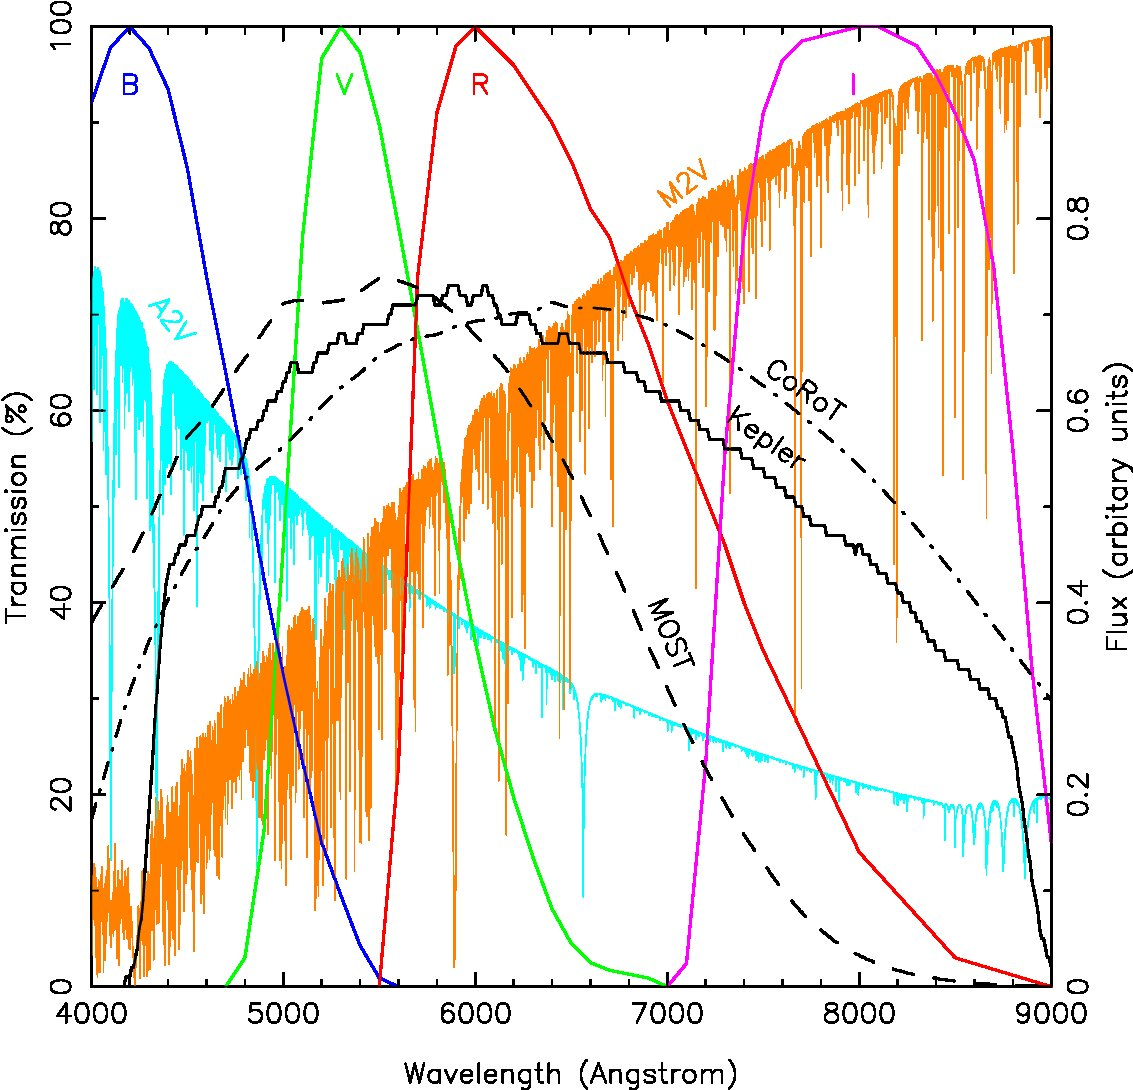

In [13]:
Image('nb-data/kepler_and_johnson_bandpasses.jpg')

Ok, so it's not crazy to say "Kepler magnitudes are ~give or take the same as Johnson's R" (which is what's plotted). N.b. SDSS r, which is what HAT uses, is ~550-700nm. Yes, this is the peak of the Kepler curve, but Kepler is OFC very sensitive to M dwarfs that HAT is very _insensitive_ to, b/c they're so faint in SDSS r.

In [14]:
# %load ../../hat/src/04_make_DEB_catalog.py

0 of 58
088 retrieved.
0 of 479
100 of 479
200 of 479
300 of 479
400 of 479
081 retrieved.
0 of 208
100 of 208
200 of 208
133 retrieved.
0 of 217
100 of 217
200 of 217
248 retrieved.
0 of 588
100 of 588
200 of 588
300 of 588
400 of 588
500 of 588
115 retrieved.
0 of 57
199 retrieved.
0 of 369
100 of 369
200 of 369
300 of 369
160 retrieved.
0 of 366
100 of 366
200 of 366
300 of 366
389 retrieved.
0 of 235
100 of 235
200 of 235
247 retrieved.
0 of 495
100 of 495
200 of 495
300 of 495
400 of 495
311 retrieved.
0 of 163
100 of 163
242 retrieved.
0 of 327
100 of 327
200 of 327
300 of 327
218 retrieved.
0 of 243
100 of 243
200 of 243
169 retrieved.
0 of 691
100 of 691
200 of 691
300 of 691
400 of 691
500 of 691
600 of 691
159 retrieved.
0 of 203
100 of 203
200 of 203
132 retrieved.
0 of 319
100 of 319
200 of 319
300 of 319
215 retrieved.
0 of 258
100 of 258
200 of 258
216 retrieved.
0 of 938
100 of 938
200 of 938
300 of 938
400 of 938
500 of 938
600 of 938
700 of 938
800 of 938
900 of 938
09

In [15]:
whos

Variable               Type        Data/Info
--------------------------------------------
Image                  type        <class 'IPython.core.display.Image'>
N                      int         4351
N_p                    int         544
allpaths               list        n=6214
deblengths             list        n=1548
debpaths               list        n=1548
debperiods             list        n=1548
debrmags               list        n=1548
debrmss                list        n=1548
get_DEB_ids            function    <function get_DEB_ids at 0x7f7118763d08>
get_DEB_list           function    <function get_DEB_list at 0x7f7121306950>
itertools              module      <module 'itertools' (built-in)>
mags                   ndarray     4290: 4290 elems, type `float64`, 34320 bytes
meanmag                float64     8.02974095455
np                     module      <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
os                     module      <module 'os' from '/home/<...>s

In [11]:
import pandas as pd

In [17]:
hatids = [path.split('/')[-1][10:-4] for path in debpaths]

In [18]:
debinfo = pd.DataFrame(data={'period':debperiods, 'rms':debrmss, 'rmag':debrmags, 'length': deblengths}, index=hatids)

In [19]:
debinfo.head()

,length,period,rmag,rms
HAT-088-0001028,5471,4.398719,10.205,0.006877
HAT-088-0001040,9002,1.700917,10.091,0.013109
HAT-088-0001650,8909,2.803241,10.238,0.008798
HAT-088-0001962,9578,1.191453,10.485,0.008849
HAT-088-0000763,3565,2.372770,9.617,0.013442


In [20]:
min(debinfo['rmag'])

8.1628239000000082

In [21]:
min(debinfo['rms'])

0.0052276994896631804

Great! This tells us that none of the LCs were missing colorinfo. I.e. we got good 2MASS to SDSS r mag conversion on all of em. 

In [22]:
debinfo.to_csv('debinfo_170129.csv', index=True)

In [23]:
! head debinfo_170129.csv

,length,period,rmag,rms
HAT-088-0001028,5471,4.39871942796858,10.205,0.00687656833337079
HAT-088-0001040,9002,1.7009170749204576,10.091,0.013109067430861494
HAT-088-0001650,8909,2.803241377238375,10.238,0.008798148493151822
HAT-088-0001962,9578,1.191452860201842,10.485,0.008848759763742362
HAT-088-0000763,3565,2.3727698506157835,9.617,0.013441796611865186
HAT-088-0001244,4473,4.4707548017045085,10.039023200000006,0.009240462568740502
HAT-081-0000308,1019,1.3448280087226807,8.162823900000008,0.028389137480098765
HAT-081-0000442,1016,1.3448280087226807,8.948933800000002,0.028240226576443133
HAT-081-0000469,13881,40.87157227289729,9.361,0.05745418350925372


In [26]:
debinfo = pd.read_csv('debinfo_170129.csv')

In [27]:
debinfo = debinfo.set_index(['Unnamed: 0'])

In [28]:
debinfo.index.rename('hatid', inplace=True)

In [30]:
debinfo.head()

,length,period,rmag,rms
hatid,,,,
HAT-088-0001028,5471,4.398719,10.205,0.006877
HAT-088-0001040,9002,1.700917,10.091,0.013109
HAT-088-0001650,8909,2.803241,10.238,0.008798
HAT-088-0001962,9578,1.191453,10.485,0.008849
HAT-088-0000763,3565,2.372770,9.617,0.013442


All these rms's are currently wrong, b/c they were calculated for detached EB light curves. So they'll be noisy AF!

In [31]:
! ls nb-data/*csv

nb-data/HAT-579-0051858-V0-DR0-e867e20a15f25116548f6cdf8d5105f2-hatlc.csv
nb-data/HAT_rms_vs_mag.csv
nb-data/kepler_precision.csv


In [32]:
! head nb-data/HAT_rms_vs_mag.csv

8.666666666666666, 0.02782111985161374
8.872380952380952, 0.0293090597054086
9.123809523809523, 0.031145863585741767
9.314285714285713, 0.03141749757235986
9.596190476190475, 0.0298225181627751
9.786666666666665, 0.027821119851613726
9.946666666666665, 0.02640871858659532
10.167619047619047, 0.024002914874137502
10.342857142857142, 0.020708725081088813
10.533333333333331, 0.01740720729568164


The above is data from published HATNet data (somewhere). So _presumably_ it's not looking at EB data exclusively, or if it is, it's mixed in with everything else! N.b. the dark blue points here are actually TFA corrected (but presumably similar procedures can be applied to the LCs I get and identify EBs in; sigma clipping is not mandatory)

In [33]:
hatdat = pd.read_csv('nb-data/HAT_rms_vs_mag.csv', names=['rmag','rms'])

In [34]:
hatdat.head()

,rmag,rms
0,8.666667,0.027821
1,8.872381,0.029309
2,9.123810,0.031146
3,9.314286,0.031417
4,9.596190,0.029823


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


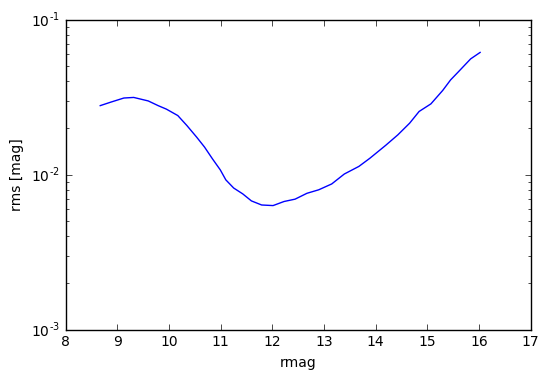

In [39]:
fig, ax = plt.subplots()
ax.plot(hatdat['rmag'], hatdat['rms'])
ax.set(xlabel='rmag', ylabel='rms [mag]', yscale='log')
fig.show()

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


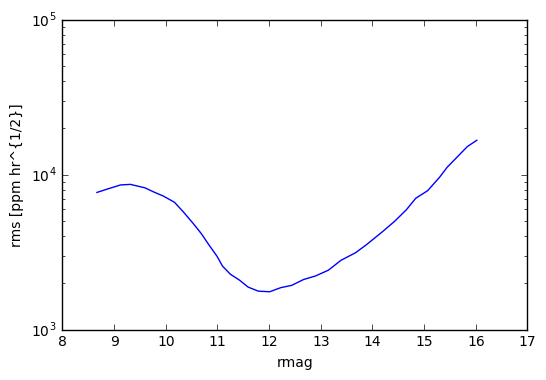

In [43]:
binningfactor = (60/5.5)**(1/2.)
HAT_RMS_ppm = (1 - 10**(-2./5. * np.array(hatdat['rms']))) * 1e6 
HAT_rmags = hatdat['rmag']

plt.close('all')
fig, ax = plt.subplots()
ax.plot(HAT_rmags, HAT_RMS_ppm/binningfactor)
ax.set(xlabel='rmag', ylabel='rms [ppm hr^{1/2}]', yscale='log')
fig.show()




In [44]:
hatdat['rms_ppm_hr'] = HAT_RMS_ppm / binningfactor

In [45]:
hatdat.to_csv('debinfo_170130.csv')

In [46]:
hatdat.head()

,rmag,rms,rms_ppm_hr
0,8.666667,0.027821,7659.557210
1,8.872381,0.029309,8063.705526
2,9.123810,0.031146,8561.847635
3,9.314286,0.031417,8635.443402
4,9.596190,0.029823,8203.040583


In [47]:
! mv debinfo_170130.csv hatdat_170130.csv

Ok, now recompute `debinfo['rms']`:

In [48]:
debinfo.head()

,length,period,rmag,rms
hatid,,,,
HAT-088-0001028,5471,4.398719,10.205,0.006877
HAT-088-0001040,9002,1.700917,10.091,0.013109
HAT-088-0001650,8909,2.803241,10.238,0.008798
HAT-088-0001962,9578,1.191453,10.485,0.008849
HAT-088-0000763,3565,2.372770,9.617,0.013442


In [53]:
from scipy.interpolate import interp1d
f = interp1d(HAT_rmags, HAT_RMS_ppm, kind='linear')
rms_new = f(debinfo['rmag'][np.array(debinfo['rmag']>min(HAT_rmags)) \
                            & np.array(debinfo['rmag']<max(HAT_rmags))])

rms_new

array([ 21230.90019474,  22615.66537815,  20671.18441388, ...,
        17170.13049617,  24140.55480961,  15444.18912519])

In [54]:
len(debinfo['rmag'][np.array(debinfo['rmag']>min(HAT_rmags)) \
                            & np.array(debinfo['rmag']<max(HAT_rmags))])

1545

In [55]:
len(debinfo['rmag'])

1548

Ok, so it's reasonably representative. __OBVIOUSLY__ good enough for OOM.

In [60]:
debinfo_rmag = np.array(debinfo['rmag'][np.array(debinfo['rmag']>min(HAT_rmags)) \
                            & np.array(debinfo['rmag']<max(HAT_rmags))])

In [62]:
debinfo_rmag[:5]

array([ 10.205,  10.091,  10.238,  10.485,   9.617])

In [63]:
rms_new[:5]

array([ 21230.90019474,  22615.66537815,  20671.18441388,  16662.97195116,
        26897.64032166])

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


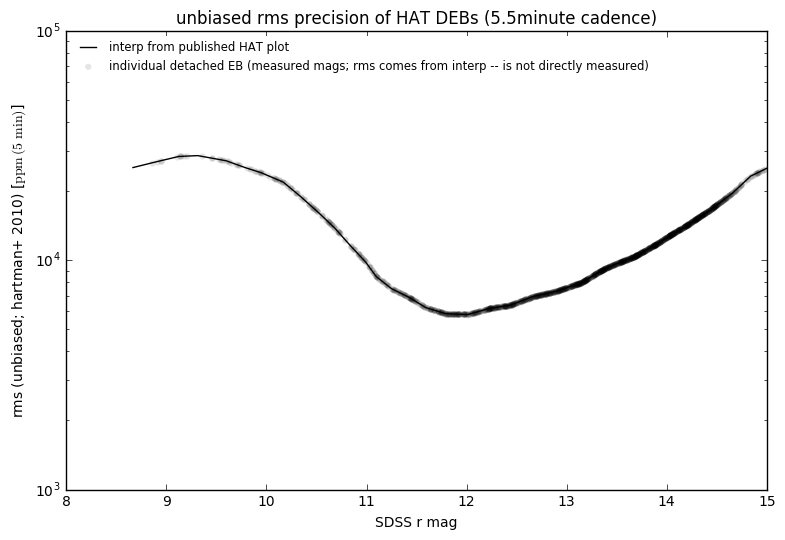

In [75]:
plt.close('all')
fig, ax = plt.subplots(figsize=(8, 5.5))
ax.scatter(debinfo_rmag, rms_new, linewidth=0, 
           alpha=0.1, color='k', zorder=0, label='individual detached EB (measured mags; rms comes from interp -- is not directly measured)')

ax.plot(HAT_rmags, HAT_RMS_ppm, 'k-', lw=1, zorder=1, label='interp from published HAT plot')

ax.set(xlabel='SDSS r mag', ylabel='rms (unbiased; hartman+ 2010) [$\mathrm{ppm\,(5\ min)}$]', 
       xlim=[8,15], title='unbiased rms precision of HAT DEBs (5.5minute cadence)',
       yscale='log')

leg = ax.legend(loc='upper left', fontsize='small', scatterpoints=1)
leg.get_frame().set_linewidth(0.)

fig.tight_layout()
fig.savefig('plots/rms_unbiased_vs_rmag_HAT_DEBs.pdf')
fig.show()

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


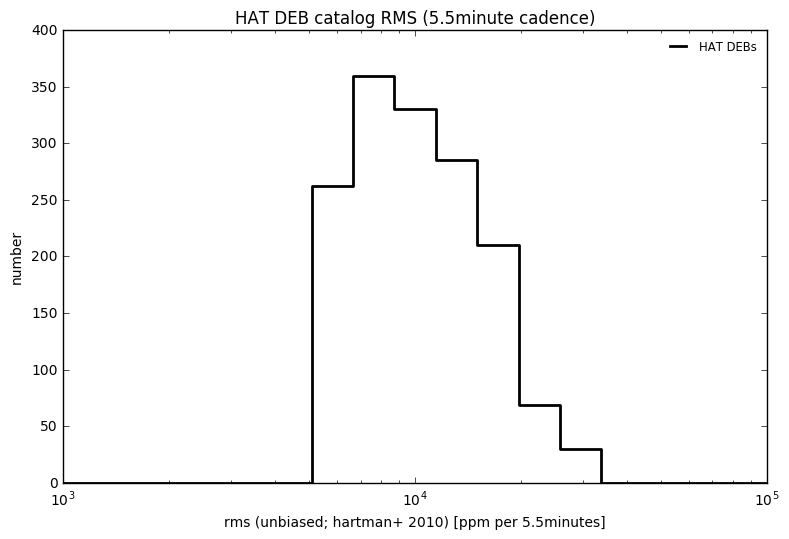

In [77]:
bins = np.logspace(3,5,18)

allvals, binedge = np.histogram(rms_new, bins=bins)
allvals = np.insert(allvals, 0, allvals[0])

fig, ax = plt.subplots(figsize=(8,5.5))

ax.semilogx(bins, allvals, ls='steps-', lw=2, c='k', label='HAT DEBs')
ylims = ax.get_ylim()

leg = ax.legend(loc='best', fontsize='small')
leg.get_frame().set_linewidth(0.)

ax.set(xlabel='rms (unbiased; hartman+ 2010) [ppm per 5.5minutes]', ylabel='number', title='HAT DEB catalog RMS (5.5minute cadence)')
fig.tight_layout()
fig.savefig('plots/rms_unbiased_histogram_HAT_DEBs.pdf')
fig.show()

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


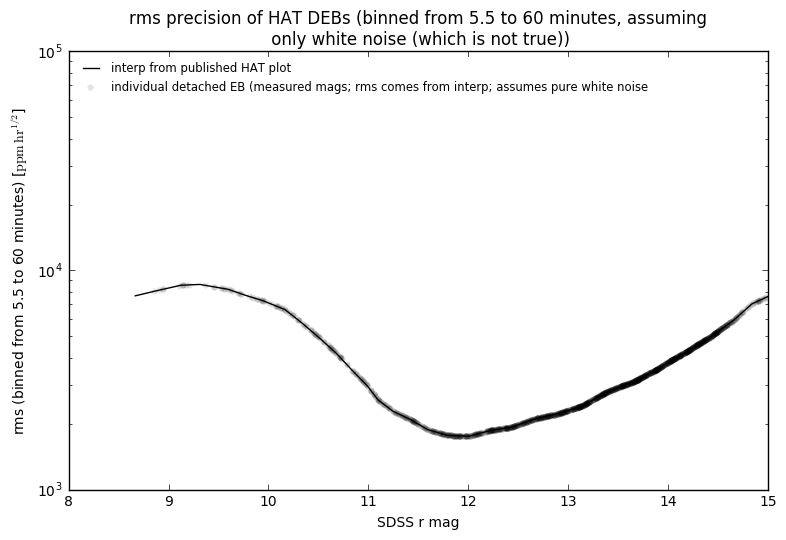

In [78]:
plt.close('all')
binningfactor = (60/5.5)**(1/2.)

fig, ax = plt.subplots(figsize=(8, 5.5))
ax.scatter(debinfo_rmag, rms_new/binningfactor, linewidth=0, 
           alpha=0.1, color='k', zorder=0, label='individual detached EB (measured mags; rms comes from interp; assumes pure white noise')

ax.plot(HAT_rmags, HAT_RMS_ppm/binningfactor, 'k-', lw=1, zorder=1, label='interp from published HAT plot')

ax.set(xlabel='SDSS r mag', ylabel='rms (binned from 5.5 to 60 minutes) [$\mathrm{ppm\,hr^{1/2}}$]', 
       xlim=[8,15], 
       title='rms precision of HAT DEBs (binned from 5.5 to 60 minutes, assuming\n only white noise (which is not true))',
       yscale='log')

leg = ax.legend(loc='upper left', fontsize='small', scatterpoints=1)
leg.get_frame().set_linewidth(0.)

fig.tight_layout()
fig.savefig('plots/rms_binned_vs_rmag_HAT_DEBs.pdf')
fig.show()

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


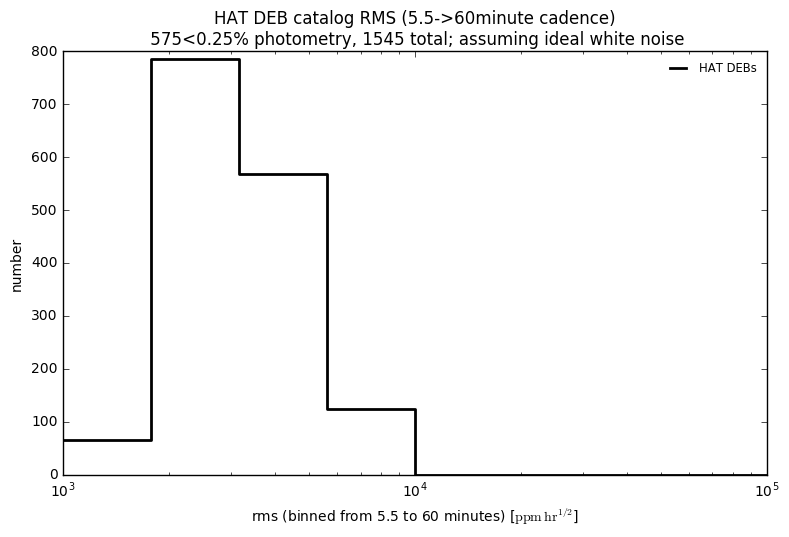

In [107]:
bins = np.logspace(3,5,9)

allvals, binedge = np.histogram(rms_new/binningfactor, bins=bins)
allvals = np.insert(allvals, 0, allvals[0])

fig, ax = plt.subplots(figsize=(8,5.5))

ax.semilogx(bins, allvals, ls='steps-', lw=2, c='k', label='HAT DEBs')
ylims = ax.get_ylim()

leg = ax.legend(loc='best', fontsize='small')
leg.get_frame().set_linewidth(0.)

xvals = rms_new/binningfactor
ax.set(xlabel='rms (binned from 5.5 to 60 minutes) [$\mathrm{ppm\,hr^{1/2}}$]', ylabel='number', 
       title='HAT DEB catalog RMS (5.5->60minute cadence)\n {:d}<0.25% photometry, {:d} total; assuming ideal white noise'.format(\
       len(xvals[xvals<2.5e3]),len(xvals)  ))

fig.tight_layout()
fig.savefig('plots/rms_binned_histogram_HAT_DEBs.pdf')
fig.show()

In [84]:
from astropy.io import ascii

keb_path = '../data/kepler_eb_catalog_v3.csv'
cols = 'KIC,period,period_err,bjd0,bjd0_err,morph,GLon,GLat,kmag,Teff,SC'
cols = tuple(cols.split(','))

tab = ascii.read(keb_path)
currentcols = tab.colnames
for ix, col in enumerate(cols):
    tab.rename_column(currentcols[ix], col)
tab.remove_column('col12') # remnant of import

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


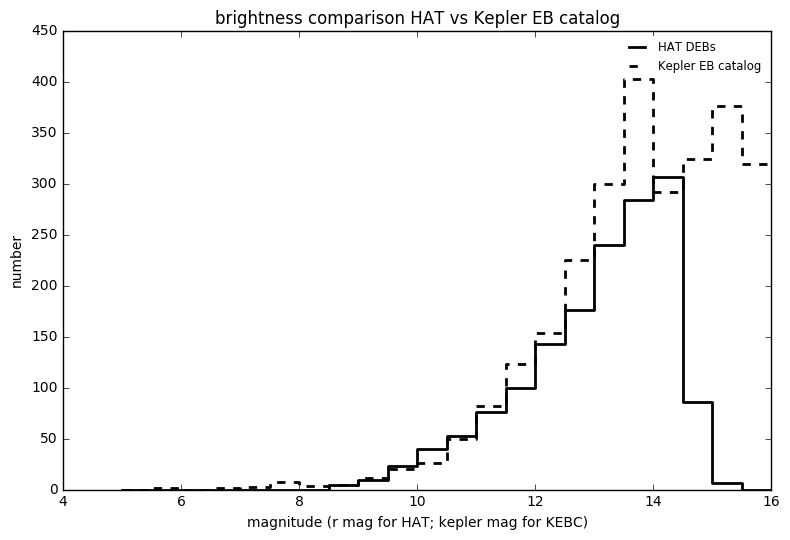

In [85]:
bins = np.arange(5,16.5,0.5)

fig, ax = plt.subplots(figsize=(8,5.5))

allvals, binedge = np.histogram(debinfo_rmag, bins=bins)
allvals = np.insert(allvals, 0, allvals[0])
ax.plot(bins, allvals, ls='steps-', lw=2, c='k', label='HAT DEBs')

allvals, binedge = np.histogram(tab['kmag'], bins=bins)
allvals = np.insert(allvals, 0, allvals[0])
ax.plot(bins, allvals, ls='steps--', lw=2, c='k', label='Kepler EB catalog')

leg = ax.legend(loc='best', fontsize='small')
leg.get_frame().set_linewidth(0.)

ax.set(xlabel='magnitude (r mag for HAT; kepler mag for KEBC)', ylabel='number', 
       title='brightness comparison HAT vs Kepler EB catalog')
fig.tight_layout()
fig.savefig('plots/mag_histogram_HAT_vs_Kepler_DEBs.pdf')
fig.show()

We want:

* (X) plots (histogram+ rms vs magnitude) of the RMS precision for HAT LCs (in the DEB sample).
* (X) histogram of the RMS precison of Kepler Eclipsing Binary Catalog LCs.
* histograms of the _observed magnitudes_.
* a plot that compares (even if roughly) the precision as a function of magnitude for Kepler vs TESS vs HAT.

(N.b. this might be another selling point of the HAT LCs for an EB catalog: they are **brighter**)

In [86]:
# use Kepler precision data from https://keplergo.arc.nasa.gov/CalibrationSN.shtml

In [87]:
ls nb-data/

checkplot-HAT-199-0000452.pkl
checkplot-HAT-199-0000452.png
checkplot-inj-HAT-199-0000452.pkl
checkplot-inj-HAT-199-0000452.png
checkplot-injresiduals-HAT-199-0000452.pkl
HAT-579-0051858-V0-DR0-e867e20a15f25116548f6cdf8d5105f2-hatlc.csv
HAT-772-0554686-V0-DR0-hatlc.sqlite
HAT-777-0058978-V0-DR0-hatlc.sqlite
HAT_rms_vs_mag.csv
kepler_and_johnson_bandpasses.jpg
kepler_precision.csv
plots/


In [88]:
kep = pd.read_csv('nb-data/kepler_precision.csv', delimiter='|')
kep.head()

,K_p,counts,precision_ppm
0,7.77,18300000000,155
1,8.08,13200000000,70
2,8.73,7690000000,75
3,9.28,4850000000,147
4,9.76,2870000000,103


/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


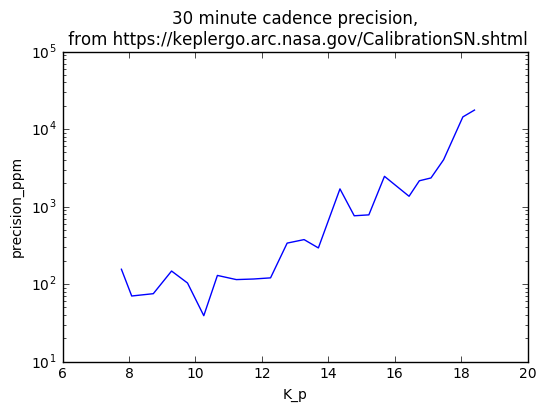

In [89]:
f,ax=plt.subplots()
ax.plot(kep['K_p'], kep['precision_ppm'])
ax.set(xlabel='K_p', ylabel='precision_ppm', yscale='log',
      title='30 minute cadence precision,\n from https://keplergo.arc.nasa.gov/CalibrationSN.shtml')
f.savefig('plots/kepler_precision.pdf')
f.show()

Ok, now compare. First, we only care about relative precision. Why do the HAT plots come in magnitude units? (They shouldn't; we care about _relative_ precision)

```    
stardepthmag_arr[ix,:] = -5/2. * np.log10(1-thesedepths)
```

So we need to do:
\begin{align}
m &= -\frac{5}{2} \log_{10} (1-\delta) \\
\delta &= 1 - 10^{-\frac{2}{5} m}
\end{align}

/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


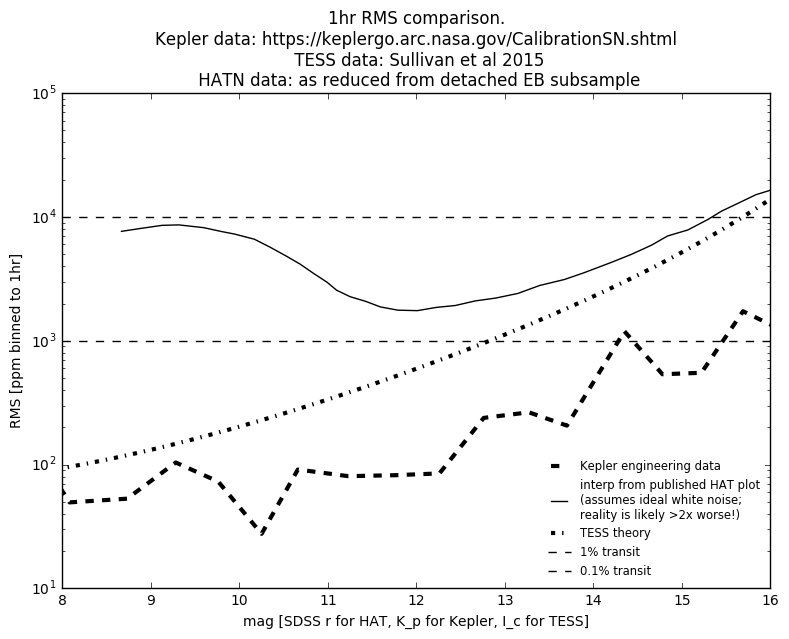

In [96]:
kep_RMS_ppm = kep['precision_ppm']/(2**(1/2.))
kep_mags = kep['K_p']

# pulled from TESS TSWG documentation, based on a fit I gave them
F = 4.73508403525e-5
E = -0.0022308015894
D = 0.0395908321369
C = -0.285041632435
B = 0.850021465753
logA = 3.29685004771

x = np.arange(7,17.5,0.05)
logy = logA + B*x + C*x**2 + D*x**3 + E*x**4 + F*x**5
TESS_RMS_ppm = np.e**logy
TESS_icmags = x

f,ax=plt.subplots(figsize=(8,6.5))
ax.plot(kep_mags, kep_RMS_ppm, 'k--', lw=3, label='Kepler engineering data')
ax.plot(HAT_rmags, HAT_RMS_ppm/binningfactor, 'k-', lw=1, zorder=1, label='interp from published HAT plot\n(assumes ideal white noise;\nreality is likely >2x worse!)')
ax.plot(TESS_icmags, TESS_RMS_ppm, 'k-.', label='TESS theory', lw=3)

ax.set(xlabel='mag [SDSS r for HAT, K_p for Kepler, I_c for TESS]', 
       ylabel='RMS [ppm binned to 1hr]', 
       yscale='log',
       title='1hr RMS comparison.\n'+\
       'Kepler data: https://keplergo.arc.nasa.gov/CalibrationSN.shtml'+\
       '\n TESS data: Sullivan et al 2015'+\
       '\n HATN data: as reduced from detached EB subsample',
       xlim=[8,16])

xlim=ax.get_xlim()
ax.hlines(1e4, xlim[0], xlim[1], linestyles='--', label='1% transit')
ax.hlines(1e3, xlim[0], xlim[1], linestyles='--', label='0.1% transit')

leg = ax.legend(loc='lower right', fontsize='small', scatterpoints=1)
leg.get_frame().set_linewidth(0.)

f.tight_layout()
f.savefig('plots/precision_comparison.pdf')
f.show()

We want:

* (X) plots (histogram+ rms vs magnitude) of the RMS precision for HAT LCs (in the DEB sample).
* histogram of the RMS precison of Kepler Eclipsing Binary Catalog LCs.
* (X) histograms of the _observed magnitudes_.
* (X) a plot that compares (even if roughly) the precision as a function of magnitude for Kepler vs TESS vs HAT.

(N.b. this might be another selling point of the HAT LCs for an EB catalog: they are **brighter**)

In [97]:
plt.close('all')

f = interp1d(kep_mags, kep_RMS_ppm, kind='linear')
KEBC_rms_ppm = f(np.array(tab['kmag'][np.array(tab['kmag']<max(kep_mags)) & np.array(tab['kmag']>min(kep_mags))] ))
KEBC_kmag = tab['kmag'][np.array(tab['kmag']<max(kep_mags)) & np.array(tab['kmag']>min(kep_mags))]


/home/luke/Dropbox/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


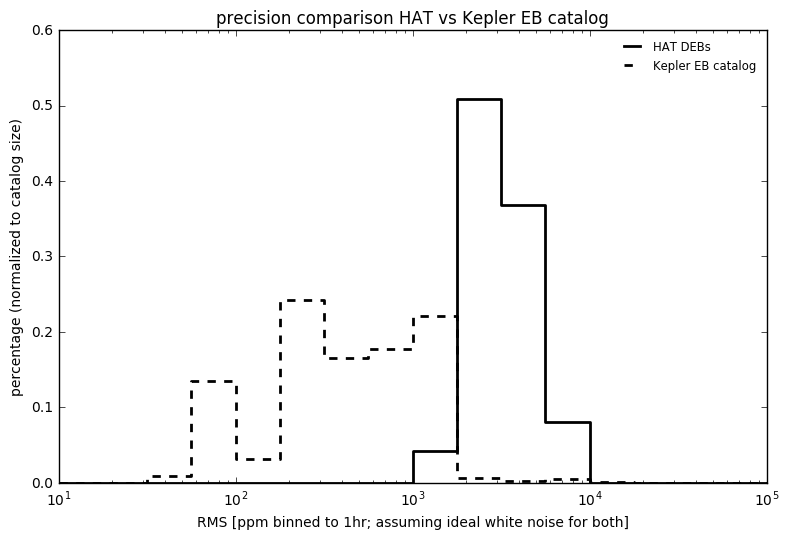

In [104]:
bins = np.logspace(1,5,17)

fig, ax = plt.subplots(figsize=(8,5.5))

deb_RMS_ppm = rms_new/binningfactor

allvals, binedge = np.histogram(deb_RMS_ppm, bins=bins)
allvals = np.insert(allvals, 0, allvals[0])
ax.plot(bins, allvals/len(deb_RMS_ppm), ls='steps-', lw=2, c='k', label='HAT DEBs')

allvals, binedge = np.histogram(KEBC_rms_ppm, bins=bins)
allvals = np.insert(allvals, 0, allvals[0])
ax.plot(bins, allvals/len(KEBC_rms_ppm), ls='steps--', lw=2, c='k', label='Kepler EB catalog')

leg = ax.legend(loc='best', fontsize='small')
leg.get_frame().set_linewidth(0.)

ax.set(xlabel='RMS [ppm binned to 1hr; assuming ideal white noise for both]', ylabel='percentage (normalized to catalog size)', 
       title='precision comparison HAT vs Kepler EB catalog',
       xscale='log')
fig.tight_layout()
fig.savefig('plots/precision_histogram_HAT_vs_Kepler_DEBs.pdf')
fig.show()

In [99]:
np.median(KEBC_rms_ppm)

541.65504381495975

In [100]:
np.median(HAT_RMS_ppm)

15904.79190059213

In [101]:
np.median(HAT_RMS_ppm)/np.median(KEBC_rms_ppm)

29.36332280517917

So looking at the median, it's like a factor of 30x worse precision for the HAT DEBs.

We want:

* (X) plots (histogram+ rms vs magnitude) of the RMS precision for HAT LCs (in the DEB sample).
* (X) histogram of the RMS precison of Kepler Eclipsing Binary Catalog LCs.
* (X) histograms of the _observed magnitudes_.
* (X) a plot that compares (even if roughly) the precision as a function of magnitude for Kepler vs TESS vs HAT.

(N.b. this might be another selling point of the HAT LCs for an EB catalog: they are **brighter**)

In [46]:
weirdpaths

['/media/luke/LGB_tess_data/hat/CPs_cut/G088_20/checkplot-HAT-088-0000816.pkl',
 '/media/luke/LGB_tess_data/hat/CPs_cut/G081_20/checkplot-HAT-081-0006664.pkl',
 '/media/luke/LGB_tess_data/hat/CPs_cut/G248_20/checkplot-HAT-248-0000822.pkl',
 '/media/luke/LGB_tess_data/hat/CPs_cut/G160_20/checkplot-HAT-160-0001233.pkl',
 '/media/luke/LGB_tess_data/hat/CPs_cut/G311_20/checkplot-HAT-311-0003699.pkl',
 '/media/luke/LGB_tess_data/hat/CPs_cut/G311_20/checkplot-HAT-311-0003988.pkl',
 '/media/luke/LGB_tess_data/hat/CPs_cut/G311_20/checkplot-HAT-311-0004022.pkl',
 '/media/luke/LGB_tess_data/hat/CPs_cut/G311_20/checkplot-HAT-311-0004170.pkl',
 '/media/luke/LGB_tess_data/hat/CPs_cut/G311_20/checkplot-HAT-311-0004265.pkl',
 '/media/luke/LGB_tess_data/hat/CPs_cut/G311_20/checkplot-HAT-311-0004298.pkl',
 '/media/luke/LGB_tess_data/hat/CPs_cut/G311_20/checkplot-HAT-311-0007357.pkl',
 '/media/luke/LGB_tess_data/hat/CPs_cut/G311_20/checkplot-HAT-311-0018653.pkl',
 '/media/luke/LGB_tess_data/hat/CPs_cut/

In [47]:
wps = pd.Series(weirdpaths)
wps.to_csv('weirdpaths.csv')

In [48]:
debcsvs = pd.Series(debpaths)
debcsvs.to_csv('debpaths.csv')

In [50]:
! head weirdpaths.csv

0,/media/luke/LGB_tess_data/hat/CPs_cut/G088_20/checkplot-HAT-088-0000816.pkl
1,/media/luke/LGB_tess_data/hat/CPs_cut/G081_20/checkplot-HAT-081-0006664.pkl
2,/media/luke/LGB_tess_data/hat/CPs_cut/G248_20/checkplot-HAT-248-0000822.pkl
3,/media/luke/LGB_tess_data/hat/CPs_cut/G160_20/checkplot-HAT-160-0001233.pkl
4,/media/luke/LGB_tess_data/hat/CPs_cut/G311_20/checkplot-HAT-311-0003699.pkl
5,/media/luke/LGB_tess_data/hat/CPs_cut/G311_20/checkplot-HAT-311-0003988.pkl
6,/media/luke/LGB_tess_data/hat/CPs_cut/G311_20/checkplot-HAT-311-0004022.pkl
7,/media/luke/LGB_tess_data/hat/CPs_cut/G311_20/checkplot-HAT-311-0004170.pkl
8,/media/luke/LGB_tess_data/hat/CPs_cut/G311_20/checkplot-HAT-311-0004265.pkl
9,/media/luke/LGB_tess_data/hat/CPs_cut/G311_20/checkplot-HAT-311-0004298.pkl
